<a href="https://colab.research.google.com/github/AdityaAK50/Data-Analyst2-Customer-Satisfaction-Prediction-/blob/main/Customer_Satisfaction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/customer_support_tickets (1).csv'
data = pd.read_csv(file_path)

In [ ]:
print("Initial Data:")
print(data.head())

Initial Data:
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Periphe

In [ ]:
numerical_summary = data.describe(include='number')
print("\nSummary Statistics for Numerical Features:")
print(numerical_summary)


Summary Statistics for Numerical Features:
         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


In [ ]:
mean_values = data.mean(numeric_only=True)
median_values = data.median(numeric_only=True)
std_dev_values = data.std(numeric_only=True)

In [ ]:
mode_values = data.mode(numeric_only=True).iloc[0]

In [ ]:
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Standard Deviation': std_dev_values
})

In [ ]:
print("\nDetailed Summary Statistics:")
print(summary_stats)


Detailed Summary Statistics:
                                     Mean  Median  Mode  Standard Deviation
Ticket ID                     4235.000000  4235.0   1.0         2444.934048
Customer Age                    44.026804    44.0  52.0           15.296112
Customer Satisfaction Rating     2.991333     3.0   3.0            1.407016


In [ ]:
categorical_columns = ['ticket_type', 'customer_gender']

for column in categorical_columns:
    if column in data.columns:
        frequency_counts = data[column].value_counts()
        print(f"\nFrequency Counts for {column}:")
        print(frequency_counts)
    else:
        print(f"\nColumn '{column}' does not exist in the dataset.")


Column 'ticket_type' does not exist in the dataset.

Column 'customer_gender' does not exist in the dataset.


# Exploratory Data Analysis (EDA)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/customer_support_tickets (1).csv'
data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
print("Initial Data:")
print(data.head())

Initial Data:
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Periphe

In [ ]:
sns.set(style="whitegrid")

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

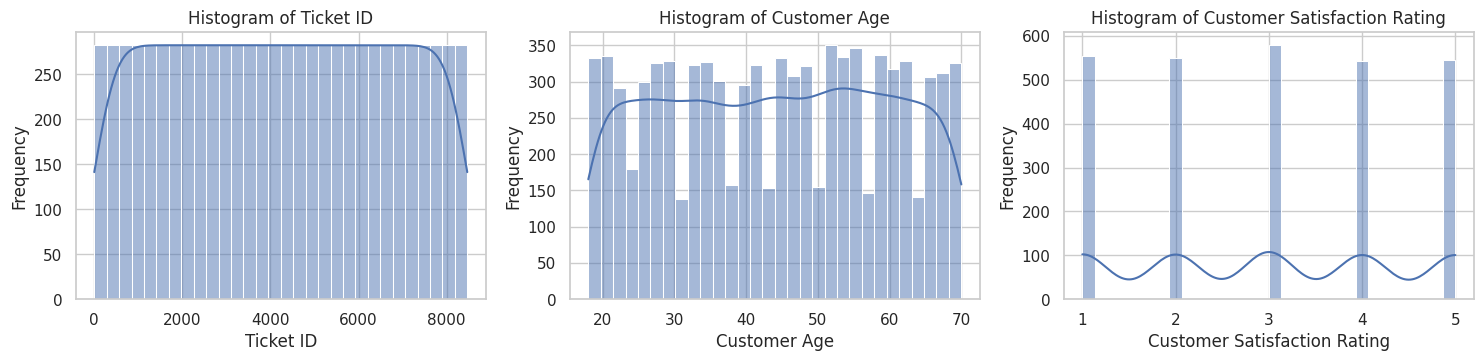

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

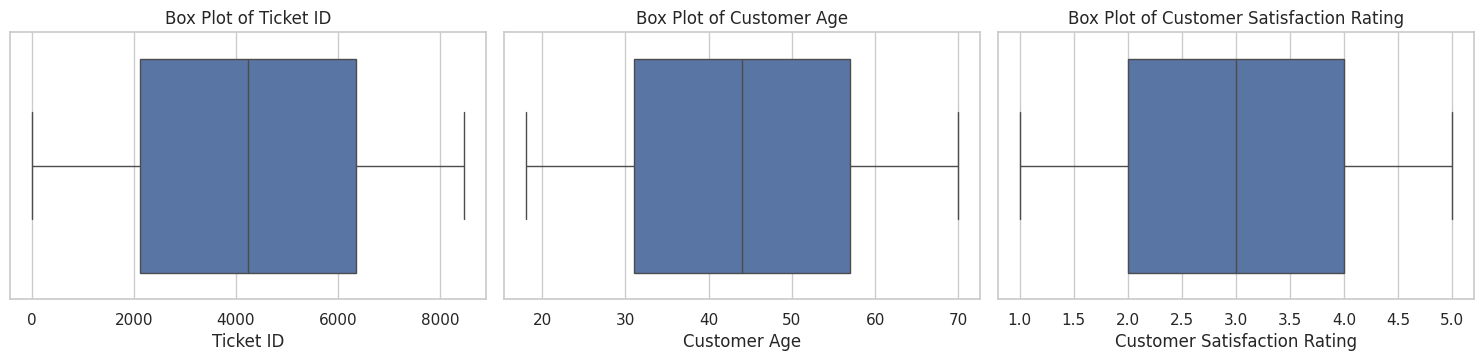

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
categorical_columns = ['ticket_type', 'customer_gender']

In [ ]:
for column in categorical_columns:
    if column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=column, palette='viridis')
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{column}' does not exist in the dataset.")

Column 'ticket_type' does not exist in the dataset.
Column 'customer_gender' does not exist in the dataset.


In [ ]:
if 'response.code' in data.columns and 'resolution_time' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='resolution_time', y='response.code', alpha=0.6)
    plt.title('Customer Satisfaction vs. Ticket Resolution Time')
    plt.xlabel('Ticket Resolution Time')
    plt.ylabel('Customer Satisfaction (Response Code)')
    plt.axhline(200, color='red', linestyle='--', label='Success Threshold')
    plt.legend()
    plt.show()
else:
    print("One or both of the columns 'response.code' and 'resolution_time' do not exist in the dataset.")

One or both of the columns 'response.code' and 'resolution_time' do not exist in the dataset.


# Sentiment Analysis

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/customer_support_tickets (1).csv'
data = pd.read_csv(file_path)

In [ ]:
if 'ticket_description' in data.columns:
    data['sentiment'] = data['ticket_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

    print("\nData with Sentiment Scores:")
    print(data[['ticket_description', 'sentiment']].head())

    if 'response.code' in data.columns:
        correlation = data[['sentiment', 'response.code']].corr()
        print("\nCorrelation between Sentiment Scores and Customer Satisfaction Ratings:")
        print(correlation)

        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='sentiment', y='response.code', data=data)
        plt.title('Sentiment Scores vs Customer Satisfaction Ratings')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Customer Satisfaction Rating (Response Code)')
        plt.axhline(200, color='red', linestyle='--', label='Success Threshold')
        plt.legend()
        plt.show()

        avg_sentiment = data['sentiment'].mean()
        print(f"\nAverage Sentiment Score: {avg_sentiment:.2f}")
        print("Conducting these analyses provides valuable insights into customer satisfaction trends, "
              "identifies areas for improvement in customer support, and helps in developing predictive models "
              "that can enhance customer experience.")
    else:
        print("The dataset does not contain a 'response.code' column.")
else:
    print("The dataset does not contain a 'ticket_description' column.")

The dataset does not contain a 'ticket_description' column.


# Customer Segmentation

In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/customer_support_tickets (1).csv'
data = pd.read_csv(file_path)

In [ ]:
print("Initial Data:")
print(data.head())

Initial Data:
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Periphe

In [ ]:
if 'ticket_description' in data.columns:
    data['sentiment'] = data['ticket_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

    print("\nData with Sentiment Scores:")
    print(data[['ticket_description', 'sentiment']].head())

    features = data[['sentiment', 'response.code', 'ticket_type']].copy()

    features = pd.get_dummies(features, columns=['ticket_type'], drop_first=True)

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid()
    plt.show()

    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['cluster'] = kmeans.fit_predict(features_scaled)

    cluster_analysis = data.groupby('cluster').mean(numeric_only=True)
    print("\nCluster Characteristics:")
    print(cluster_analysis)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='sentiment', y='response.code', hue='cluster', data=data, palette='viridis', alpha=0.6)
    plt.title('Customer Segments Visualization')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Customer Satisfaction (Response Code)')
    plt.axhline(200, color='red', linestyle='--', label='Success Threshold')
    plt.legend()
    plt.show()

else:
    print("The dataset does not contain a 'ticket_description' column.")

The dataset does not contain a 'ticket_description' column.


# Correlation Analysis

In [ ]:
if 'response.code' in data.columns and 'resolution_time' in data.columns:
    correlation_matrix = data[['response.code', 'resolution_time']].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='resolution_time', y='response.code', data=data, alpha=0.6)
    plt.title('Customer Satisfaction vs. Ticket Resolution Time')
    plt.xlabel('Ticket Resolution Time')
    plt.ylabel('Customer Satisfaction (Response Code)')
    plt.axhline(200, color='red', linestyle='--', label='Success Threshold')
    plt.legend()
    plt.show()

else:
    print("One or both of the columns 'response.code' and 'resolution_time' do not exist in the dataset.")

One or both of the columns 'response.code' and 'resolution_time' do not exist in the dataset.


# Trend Analysis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/customer_support_tickets (1).csv'
data = pd.read_csv(file_path)

In [ ]:
print("Initial Data:")
print(data.head())

Initial Data:
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Periphe

In [ ]:
if 'creation_time' in data.columns:
    data['creation_time'] = pd.to_datetime(data['creation_time'])

In [ ]:
if 'creation_time' in data.columns:
    data['creation_time'] = pd.to_datetime(data['creation_time'])

    data.set_index('creation_time', inplace=True)

In [ ]:
if 'creation_time' in data.columns:
    data['creation_time'] = pd.to_datetime(data['creation_time'])

    data.set_index('creation_time', inplace=True)

    monthly_tickets = data.resample('M').size()

    monthly_satisfaction = data.resample('M')['response.code'].mean()

    plt.figure(figsize=(14, 7))

    plt.subplot(2, 1, 1)
    monthly_tickets.plot(kind='bar', color='skyblue', alpha=0.7)
    plt.title('Monthly Ticket Volume')
    plt.xlabel('Month')
    plt.ylabel('Number of Tickets')
    plt.xticks(rotation=45)
    plt.grid()

    plt.subplot(2, 1, 2)
    monthly_satisfaction.plot(kind='line', marker='o', color='orange')
    plt.title('Average Customer Satisfaction Over Time')
    plt.xlabel('Month')
    plt.ylabel('Average Satisfaction Rating (Response Code)')
    plt.axhline(200, color='red', linestyle='--', label='Success Threshold')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()

    plt.tight_layout()
    plt.show()

else:
    print("The dataset does not contain a 'creation_time' column.")

The dataset does not contain a 'creation_time' column.


# Predictive Modeling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
file_path = '/content/customer_support_tickets (1).csv'
data = pd.read_csv(file_path)

print("Initial Data:")
print(data.head())

Initial Data:
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Periphe

In [ ]:
if 'response.code' in data.columns and 'resolution_time' in data.columns:

    data = data[['response.code', 'resolution_time', 'ticket_type', 'customer_gender']].dropna()

    X = data[['resolution_time', 'ticket_type', 'customer_gender']]
    y = data['response.code']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['resolution_time']),
            ('cat', OneHotEncoder(), ['ticket_type', 'customer_gender'])
        ])

    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nMean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

else:
    print("The dataset does not contain the required columns for prediction.")

The dataset does not contain the required columns for prediction.
